# <center>  Predict Severity of Car Accident </center>

# Introduction
This notebook will be mainly used for the capstone project.  
In this project we will try to predict the severity of car collisions from the real-time available data.  
Let's start playing with the data. We will be working according to the following workflow: 
1.  Data Acquisition
-   Data cleaning
-   Exploratory data analysis
-   Regressiong Model
-   Clasification Model
-   Model Evaluation

In [1]:
# !conda install -c anaconda seaborn -y

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

# 1. Data Acquisition
We download the the dataset [National Collision Database](https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a) and save it as __"NCDB.csv"__. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| C_WDAY         | WDay of week                                        |
| C_SEV          | Collision severity                                                   |
| C_VEHS         | Number of vehicles involved in collision |
| C_CONF         | Collision configuration                                         |
| C_RCFG         | Roadway configuration              |
| C_WTHR         | Weather condition|
| C_RSUR         | Road surface|
| C_RALN         | Road alignment|
| C_TRAF         | Traffic control|

A detailed data dictionary can be found [here](https://opendatatc.blob.core.windows.net/opendatatc/NCDB_Data_Dictionary.docx)

In [3]:
# Read the online file by the URL provides above, and assign it to variable "df"
# other_path = "https://opendatatc.blob.core.windows.net/opendatatc/NCDB_1999_to_2017.csv"
file_path = 'NCDB_1999_to_2017.csv'
ori_df = pd.read_csv(file_path)

/Users/hanrong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# source_df=source_df[source_df['C_YEAR']<=2010]
ori_df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,752
3,1999,1,1,08,2,01,01,UU,5,3,...,01,1986,01,M,46,11,1,UU,1,753
4,1999,1,1,08,2,01,01,UU,5,3,...,NN,NNNN,01,M,05,99,2,UU,3,753


In [5]:
# let's drop unrelative columns, Vehicle level data elements, and Person level data elements
# our purpose is to predict the severity of an accident with datas like Roadway configuration, Weather condition, Road surface, Road alignment, Traffic control
# So we will keep only the Collision level data. 

ori_df = ori_df[['C_WDAY','C_SEV', 'C_VEHS','C_CONF','C_RCFG','C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF']]
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
ori_df.head(5)

The first 5 rows of the dataframe


,C_WDAY,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF
0,1,2,02,34,UU,1,5,3,03
1,1,2,02,34,UU,1,5,3,03
2,1,2,02,34,UU,1,5,3,03
3,1,2,01,01,UU,5,3,6,18
4,1,2,01,01,UU,5,3,6,18


## Basic Insight of Dataset

In [6]:
print(ori_df.dtypes)
print(ori_df.shape)

C_WDAY    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
dtype: object
(6772563, 9)


In [7]:
# let's see if C_SEV column has nan values ('Q' or 'X')
ori_df['C_SEV'].value_counts()

2    6660073
1     112490
Name: C_SEV, dtype: int64

In [8]:
# source_df = ori_df.sample(frac=0.3,random_state=4)
source_df = ori_df

In [9]:
source_df['C_SEV'].value_counts()

2    6660073
1     112490
Name: C_SEV, dtype: int64

# 2. Data Cleaning
## 2.1 Identify and handle missing values

<h3>Convert unknown values to NaN</h3>
In the dataset, missing data comes with "Q","U","X","QQ","UU" or "XX".
We replace them with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. 

In [10]:
import numpy as np

# replace "Q","U","X","QQ","UU" or "XX" to NaN
source_df.replace("Q", np.nan, inplace = True)
source_df.replace("U", np.nan, inplace = True)
source_df.replace("X", np.nan, inplace = True)
source_df.replace("QQ", np.nan, inplace = True)
source_df.replace("UU", np.nan, inplace = True)
source_df.replace("XX", np.nan, inplace = True)
source_df.head(5)

,C_WDAY,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF
0,1,2,02,34,NaN,1,5,3,03
1,1,2,02,34,NaN,1,5,3,03
2,1,2,02,34,NaN,1,5,3,03
3,1,2,01,01,NaN,5,3,6,18
4,1,2,01,01,NaN,5,3,6,18


<h3>Evaluating for Missing Data</h3>

In [11]:
print(source_df.isnull().sum())

C_WDAY      1364
C_SEV          0
C_VEHS       567
C_CONF    542188
C_RCFG    722186
C_WTHR    115738
C_RSUR    278395
C_RALN    509655
C_TRAF    359944
dtype: int64


In [12]:
# dentify_missing_values
missing_data = source_df.isnull()
# Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

C_WDAY
False    6771199
True        1364
Name: C_WDAY, dtype: int64

C_SEV
False    6772563
Name: C_SEV, dtype: int64

C_VEHS
False    6771996
True         567
Name: C_VEHS, dtype: int64

C_CONF
False    6230375
True      542188
Name: C_CONF, dtype: int64

C_RCFG
False    6050377
True      722186
Name: C_RCFG, dtype: int64

C_WTHR
False    6656825
True      115738
Name: C_WTHR, dtype: int64

C_RSUR
False    6494168
True      278395
Name: C_RSUR, dtype: int64

C_RALN
False    6262908
True      509655
Name: C_RALN, dtype: int64

C_TRAF
False    6412619
True      359944
Name: C_TRAF, dtype: int64



### Drop the whole row with missing values

In [13]:
# simply drop whole row with NaN in "price" column
# ["C_RCFG","C_WTHR","C_RSUR","C_RALN","C_TRAF"]
source_df.dropna(subset=source_df.columns, axis=0, inplace=True)

# reset index, because we droped rows
source_df.reset_index(drop=True, inplace=True)

source_df.shape

(5210874, 9)

In [14]:
source_df.head()

,C_WDAY,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF
0,1,2,02,34,02,1,1,1,01
1,1,2,02,34,02,1,1,1,01
2,1,2,02,34,02,1,1,1,01
3,1,2,01,03,03,1,1,3,05
4,1,2,02,33,02,1,1,1,05


## 2.2 Resampling

In [15]:
# check the counts of value of the dependent variable "C_SEV"
source_df['C_SEV'].value_counts()

2    5124551
1      86323
Name: C_SEV, dtype: int64

We can see that this is an imbalanced dataset, so we need to resample it first.
__Resampling__
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

![resampling](images/resampling.png)

In this project, as we have quite data, we use the __Random under-sampling__ method. 


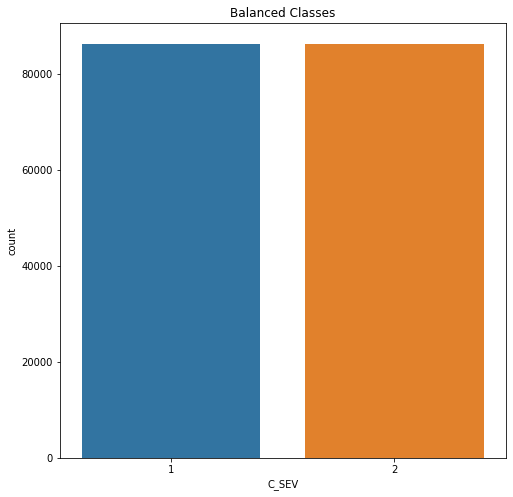

In [16]:
num=86323

# Shuffle the Dataset.
shuffled_df = source_df.sample(frac=1,random_state=4)

# Put all minority class in a separate dataset.
df_1 = shuffled_df.loc[shuffled_df['C_SEV'] == 1]

#Randomly select 3591 observations from the majority class
rdm_df2 = shuffled_df.loc[shuffled_df['C_SEV'] == 2 ].sample(n=num,random_state=10)

# Concatenate both dataframes again
resampled_df = pd.concat([df_1, rdm_df2])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('C_SEV', data=resampled_df)
plt.title('Balanced Classes')
plt.show()

## 2.3 Correct data format

In [17]:
df = resampled_df
# format all fields as string except C_VEHS as int
df = df.astype(str)
for column in df.columns:
    df[[column]] = df[[column]].astype("object")
df[["C_VEHS"]] = df[["C_VEHS"]].astype("int")
df[["C_WDAY"]] = df[["C_WDAY"]].astype("int")
df.dtypes

C_WDAY     int64
C_SEV     object
C_VEHS     int64
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
dtype: object

In [18]:
# Check if exist values in different format
for column in df.columns.values.tolist():
    print(column)
    print (df[column].value_counts())
    print("")   

C_WDAY
5    29101
6    27842
4    24551
7    24188
2    22625
3    22426
1    21913
Name: C_WDAY, dtype: int64

C_SEV
2    86323
1    86323
Name: C_SEV, dtype: int64

C_VEHS
2     96480
1     46485
3     20426
4      5611
5      1601
6       719
7       331
8       138
71       92
9        83
38       61
17       59
56       58
20       57
11       47
21       44
32       42
40       41
37       41
12       41
15       41
30       34
13       26
14       24
10       21
16       20
18        4
36        4
57        3
29        2
35        2
27        1
39        1
25        1
26        1
19        1
24        1
22        1
33        1
Name: C_VEHS, dtype: int64

C_CONF
21    34815
35    26037
31    23971
06    22235
36    11586
33    10705
04     8867
03     7135
02     6904
22     6246
01     3760
41     2462
32     2241
23     1946
34     1689
24     1317
05      447
25      283
Name: C_CONF, dtype: int64

C_RCFG
01    88306
02    73347
03     7659
05     1751
04      911
06      301


## 2.4 Binning Data

**C_CONF** has too many values, we will bin the values in 4 types according to there description in data dictionary.
- 01-06: Single Vehicle in Motion
- 21-25: Two Vehicles in Motion - Same Direction of Travel
- 31-36: Two Vehicles in Motion - Different Direction of Travel
- 41: Two Vehicles - Hit a Parked Motor Vehicle

In [19]:
# C_CONF
df[["C_CONF"]] = df[["C_CONF"]].astype("int")
bins = [0,20,30,40,50]
group_names = ['1-Vehicle', '2-Vehicles-Same', '2-Vehicles-Different','2-Vehicles-Parked']
df[['C_CONF']] = pd.cut(df['C_CONF'], bins, labels=group_names, include_lowest=True)

# df['C_CONF_binned'].value_counts()
df['C_CONF'].value_counts()

2-Vehicles-Different    76229
1-Vehicle               49348
2-Vehicles-Same         44607
2-Vehicles-Parked        2462
Name: C_CONF, dtype: int64

Let's see how __C_VEHS__ affects __C_SEV__

In [20]:
# # C_VEHS
# df['C_VEHS'].value_counts()
# bins = np.linspace(min(df["C_VEHS"]), max(df["C_VEHS"]), 4)
# bins
# # We set group names:
# group_names = ['Small', 'Medium', 'Large']
# # We apply the function "cut" the determine what each value of "df['horsepower']" belongs to.
# df['C_VEHS-binned'] = pd.cut(df['C_VEHS'], bins, labels=group_names, include_lowest=True )
# df[['C_VEHS','C_VEHS-binned']].head(20)
# # Lets see the number of vehicles in each bin.
# df["C_VEHS-binned"].value_counts()

In [21]:
df['C_SEV'].replace(to_replace=['1','2'], value=['sev1','sev2'],inplace=True)
df.head()

,C_WDAY,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF
3600510,1,sev1,1,1-Vehicle,02,1,1,1,18
100547,4,sev1,3,2-Vehicles-Different,01,1,1,1,18
2367314,4,sev1,3,2-Vehicles-Different,01,1,1,4,18
2333244,2,sev1,1,1-Vehicle,01,1,1,1,18
3191276,7,sev1,2,2-Vehicles-Different,01,1,1,4,18


# 3. Pre-processing: Feature selection/extraction

## Analyzing Individual Feature Patterns using Visualization
Lets look at the relation between each feature and severity

In [22]:
for column in df.columns:
    print("normalized value_counts of " + column)
    print(df.groupby(column)['C_SEV'].value_counts(normalize=True))

normalized value_counts of C_WDAY
C_WDAY  C_SEV
1       sev2     0.521836
        sev1     0.478164
2       sev2     0.536530
        sev1     0.463470
3       sev2     0.543030
        sev1     0.456970
4       sev2     0.524378
        sev1     0.475622
5       sev2     0.504691
        sev1     0.495309
6       sev1     0.551649
        sev2     0.448351
7       sev1     0.564784
        sev2     0.435216
Name: C_SEV, dtype: float64
normalized value_counts of C_SEV
C_SEV  C_SEV
sev1   sev1     1.0
sev2   sev2     1.0
Name: C_SEV, dtype: float64
normalized value_counts of C_VEHS
C_VEHS  C_SEV
1       sev1     0.638206
        sev2     0.361794
2       sev2     0.561246
        sev1     0.438754
3       sev2     0.560805
        sev1     0.439195
4       sev1     0.501515
        sev2     0.498485
5       sev1     0.576515
        sev2     0.423485
6       sev1     0.719054
        sev2     0.280946
7       sev1     0.770393
        sev2     0.229607
8       sev1     0.652174
        

### Numerical Data

Text(0.5, 0, 'Number of vehicles involved in collision')

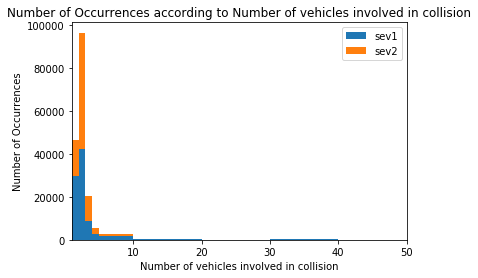

In [23]:
# C_VEHS with C_SEV
df[["C_SEV"]] = df[["C_SEV"]].astype("object")
bins = [1,2,3,4,5,10,20,30,40,50]
ax = df.pivot(columns='C_SEV').C_VEHS.plot(kind = 'hist', stacked = True,
                                           bins = bins,
                                           xlim = (min(bins), max(bins)))
ax.legend(loc='upper right')
ax.set_title('Number of Occurrences according to Number of vehicles involved in collision')
ax.set_ylabel('Number of Occurrences')
ax.set_xlabel('Number of vehicles involved in collision')

### Categorical Data

In [24]:
# c_Feature = ['C_WDAY','C_CONF','C_RCFG','C_WTHR','C_RSUR','C_RALN','C_TRAF']
# labels = ["","","","","","",""]
# fig, axs = plt.subplots(nrows = (len(c_Feature)),ncols = 1, figsize=(10, 6))

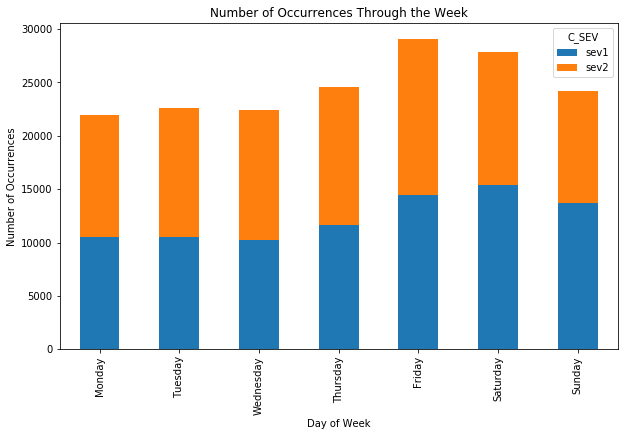

In [25]:
# C_WDAY with C_SEV
df_gptest = df[['C_WDAY','C_SEV']]
grouped_test1 = df_gptest.groupby(['C_WDAY','C_SEV']).size().unstack(level=-1)
ax = grouped_test1.plot(kind='bar', figsize=(10, 6),stacked=True)

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_xlabel('Day of Week') # add to x-label to the plot
ax.set_ylabel('Number of Occurrences') # add y-label to the plot
ax.set_title('Number of Occurrences Through the Week') # add title to the plot

plt.show()

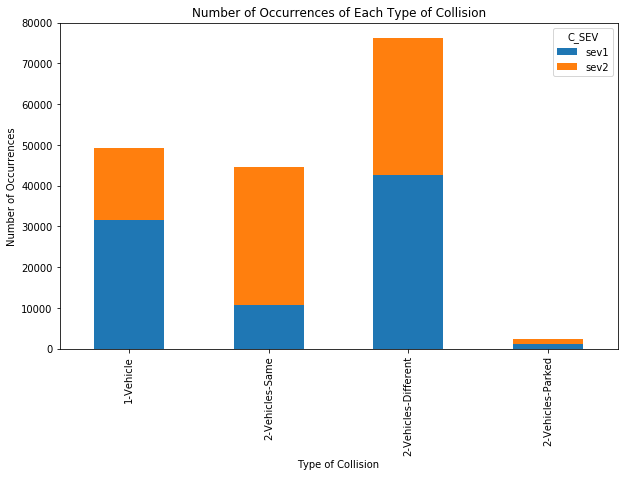

In [26]:
# C_CONF with C_SEV
df[["C_SEV"]] = df[["C_SEV"]].astype("object")
df_gptest = df[['C_CONF','C_SEV']]
grouped_test1 = df_gptest.groupby(['C_CONF','C_SEV']).size().unstack(level=-1)
ax = grouped_test1.plot(kind='bar', figsize=(10, 6),stacked=True)

ax.set_xlabel('Type of Collision') # add to x-label to the plot
ax.set_ylabel('Number of Occurrences') # add y-label to the plot
ax.set_title('Number of Occurrences of Each Type of Collision') # add title to the plot

plt.show()

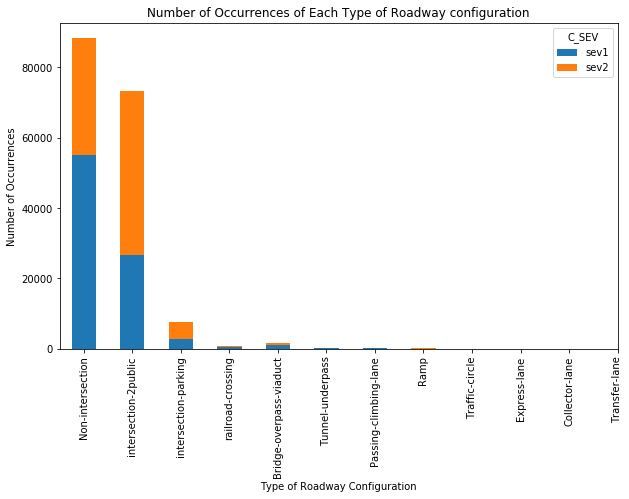

In [27]:
# C_RCFG  with C_SEV 
#df[["C_SEV"]] = df[["C_SEV"]].astype("object")
df_gptest = df[['C_RCFG','C_SEV']]
grouped_test1 = df_gptest.groupby(['C_RCFG','C_SEV']).size().unstack(level=-1)
ax = grouped_test1.plot(kind='bar', figsize=(10, 6),stacked=True)

labels = ['Non-intersection','intersection-2public','intersection-parking','railroad-crossing',
          'Bridge-overpass-viaduct','Tunnel-underpass',
          'Passing-climbing-lane','Ramp','Traffic-circle','Express-lane',
          'Collector-lane','Transfer-lane']
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_xlabel('Type of Roadway Configuration') # add to x-label to the plot
ax.set_ylabel('Number of Occurrences') # add y-label to the plot
ax.set_title('Number of Occurrences of Each Type of Roadway configuration') # add title to the plot

plt.show()

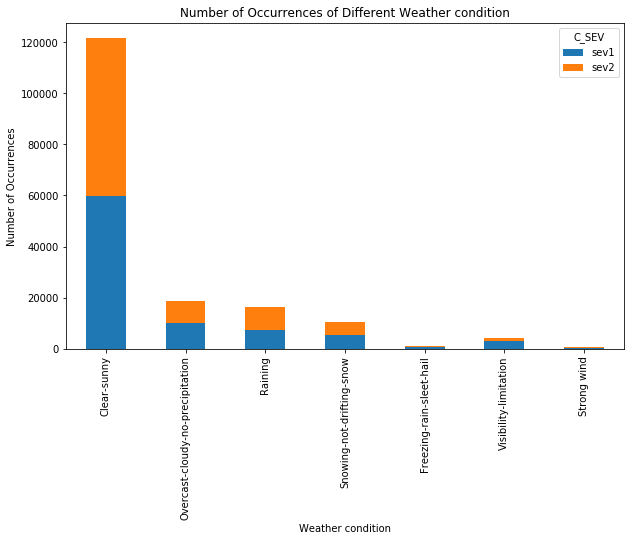

In [28]:
# C_WTHR with C_SEV
df_gptest = df[['C_WTHR','C_SEV']]
grouped_test1 = df_gptest.groupby(['C_WTHR','C_SEV']).size().unstack(level=-1)
ax = grouped_test1.plot(kind='bar', figsize=(10, 6),stacked=True)

labels = ['Clear-sunny','Overcast-cloudy-no-precipitation','Raining',
          'Snowing-not-drifting-snow',
          'Freezing-rain-sleet-hail',
          'Visibility-limitation','Strong wind']
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_xlabel('Weather condition') # add to x-label to the plot
ax.set_ylabel('Number of Occurrences') # add y-label to the plot
ax.set_title('Number of Occurrences of Different Weather condition') # add title to the plot

plt.show()

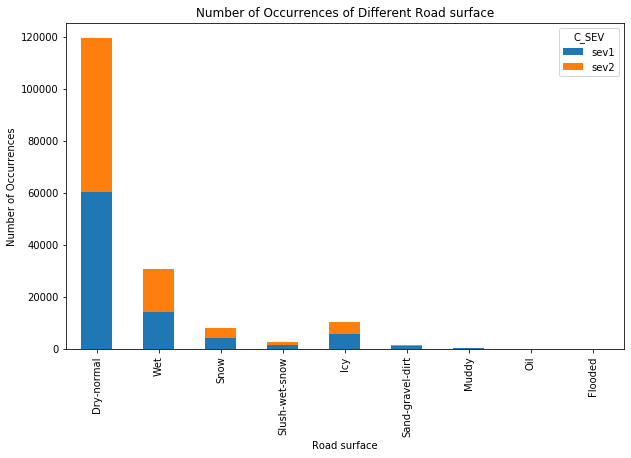

In [29]:
# C_RSUR with C_SEV
df_gptest = df[['C_RSUR','C_SEV']]
grouped_test1 = df_gptest.groupby(['C_RSUR','C_SEV']).size().unstack(level=-1)
ax = grouped_test1.plot(kind='bar', figsize=(10, 6),stacked=True)

labels = ['Dry-normal','Wet','Snow','Slush-wet-snow','Icy','Sand-gravel-dirt','Muddy',
          'Oil','Flooded']
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_xlabel('Road surface') # add to x-label to the plot
ax.set_ylabel('Number of Occurrences') # add y-label to the plot
ax.set_title('Number of Occurrences of Different Road surface') # add title to the plot

plt.show()


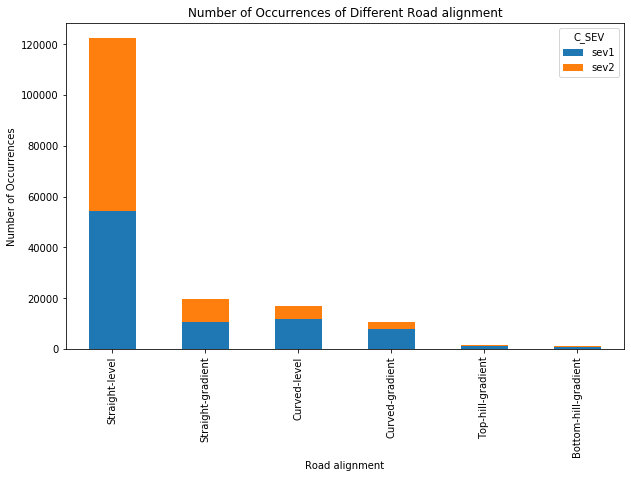

In [30]:
# C_RALN with C_SEV
df_gptest = df[['C_RALN','C_SEV']]
grouped_test1 = df_gptest.groupby(['C_RALN','C_SEV']).size().unstack(level=-1)
ax = grouped_test1.plot(kind='bar', figsize=(10, 6),stacked=True)

labels = ['Straight-level','Straight-gradient','Curved-level','Curved-gradient','Top-hill-gradient',
          'Bottom-hill-gradient']
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_xlabel('Road alignment') # add to x-label to the plot
ax.set_ylabel('Number of Occurrences') # add y-label to the plot
ax.set_title('Number of Occurrences of Different Road alignment') # add title to the plot

plt.show()

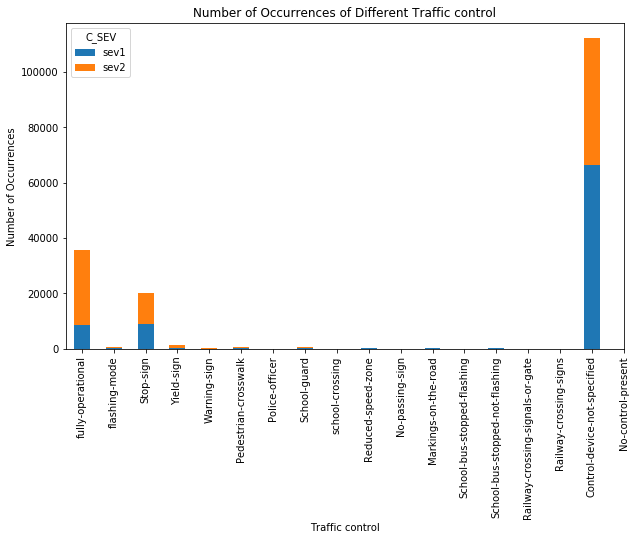

In [31]:
# C_TRAF with C_SEV
df_gptest = df[['C_TRAF','C_SEV']]
grouped_test1 = df_gptest.groupby(['C_TRAF','C_SEV']).size().unstack(level=-1)
ax = grouped_test1.plot(kind='bar', figsize=(10, 6),stacked=True)

labels = ['fully-operational','flashing-mode','Stop-sign','Yield-sign','Warning-sign',
          'Pedestrian-crosswalk','Police-officer','School-guard','school-crossing',
          'Reduced-speed-zone','No-passing-sign','Markings-on-the-road','School-bus-stopped-flashing',
          'School-bus-stopped-not-flashing',
          'Railway-crossing-signals-or-gate',
          'Railway-crossing-signs',
          'Control-device-not-specified',
          'No-control-present']
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_xlabel('Traffic control') # add to x-label to the plot
ax.set_ylabel('Number of Occurrences') # add y-label to the plot
ax.set_title('Number of Occurrences of Different Traffic control') # add title to the plot

plt.show()

<h2>Conclusion: Important Variables</h2>
<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the severity of an accident. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>C_VEHS</li>  
</ul>
    
Categorical variables:
<ul>
    <li>C_WDAY</li>
    <li>C_CONF</li>
    <li>C_RCFG</li>
    <li>C_WTHR</li>
    <li>C_RSUR</li>
    <li>C_RALN</li>
    <li>C_TRAF</li>
</ul>


## Convert Categorical features to numerical values

## One Hot Encoding  

#### Feature befor One Hot Encoding

In [32]:
df[['C_WDAY', 'C_VEHS', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR',
       'C_RALN', 'C_TRAF']].head()

,C_WDAY,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF
3600510,1,1,1-Vehicle,02,1,1,1,18
100547,4,3,2-Vehicles-Different,01,1,1,1,18
2367314,4,3,2-Vehicles-Different,01,1,1,4,18
2333244,2,1,1-Vehicle,01,1,1,1,18
3191276,7,2,2-Vehicles-Different,01,1,1,4,18


In [103]:
df.columns

Index(['C_WDAY', 'C_SEV', 'C_VEHS', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR',
       'C_RALN', 'C_TRAF'],
      dtype='object')

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [86]:
# Feature = df[['Principal','terms','age','Gender','weekend']]
# Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
# Feature.drop(['Master or Above'], axis = 1,inplace=True)

Feature = df[['C_VEHS']]
Feature = pd.concat([Feature,pd.get_dummies(df['C_CONF'])], axis=1)

Feature = pd.concat([Feature,pd.get_dummies(df['C_WDAY'])], axis=1)

rwday_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in df['C_WDAY'].unique():
    Feature.rename(columns = {i:rwday_labels[int(i)-1]}, inplace = True)


Feature = pd.concat([Feature,pd.get_dummies(df['C_RCFG'])], axis=1)

rcfg_labels = ['Non-intersection','intersection-2public','intersection-parking','railroad-crossing',
          'Bridge-overpass-viaduct','Tunnel-underpass',
          'Passing-climbing-lane','Ramp','Traffic-circle','Express-lane',
          'Collector-lane','Transfer-lane']
for i in df['C_RCFG'].unique():
    Feature.rename(columns = {i:rcfg_labels[int(i)-1]}, inplace = True)

# 'C_WTHR'
Feature = pd.concat([Feature,pd.get_dummies(df['C_WTHR'])], axis=1)

wthr_labels = ['Clear-sunny','Overcast-cloudy-no-precipitation','Raining',
          'Snowing-not-drifting-snow',
          'Freezing-rain-sleet-hail',
          'Visibility-limitation','Strong wind']
for i in df['C_WTHR'].unique():
    Feature.rename(columns = {i:wthr_labels[int(i)-1]}, inplace = True)

# 'C_RSUR'
Feature = pd.concat([Feature,pd.get_dummies(df['C_RSUR'])], axis=1)

rsur_labels = ['Dry-normal','Wet','Snow','Slush-wet-snow','Icy','Sand-gravel-dirt','Muddy',
          'Oil','Flooded']
for i in df['C_RSUR'].unique():
    Feature.rename(columns = {i:rsur_labels[int(i)-1]}, inplace = True)
# 'C_RALN'
Feature = pd.concat([Feature,pd.get_dummies(df['C_RALN'])], axis=1)

raln_labels = ['Straight-level','Straight-gradient','Curved-level','Curved-gradient','Top-hill-gradient',
          'Bottom-hill-gradient']
for i in df['C_RALN'].unique():
    Feature.rename(columns = {i:raln_labels[int(i)-1]}, inplace = True)

# 'C_TRAF'
Feature = pd.concat([Feature,pd.get_dummies(df['C_TRAF'])], axis=1)
traf_labels = ['fully-operational','flashing-mode','Stop-sign','Yield-sign','Warning-sign',
          'Pedestrian-crosswalk','Police-officer','School-guard','school-crossing',
          'Reduced-speed-zone','No-passing-sign','Markings-on-the-road','School-bus-stopped-flashing',
          'School-bus-stopped-not-flashing',
          'Railway-crossing-signals-or-gate',
          'Railway-crossing-signs',
          'Control-device-not-specified',
          'No-control-present']
for i in df['C_TRAF'].unique():
    Feature.rename(columns = {i:traf_labels[int(i)-1]}, inplace = True)

Feature.shape

(172646, 61)

In [105]:
Feature.columns.values.tolist()

['C_VEHS',
 '1-Vehicle',
 '2-Vehicles-Same',
 '2-Vehicles-Different',
 '2-Vehicles-Parked',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Non-intersection',
 'intersection-2public',
 'intersection-parking',
 'railroad-crossing',
 'Bridge-overpass-viaduct',
 'Tunnel-underpass',
 'Passing-climbing-lane',
 'Ramp',
 'Traffic-circle',
 'Express-lane',
 'Clear-sunny',
 'Overcast-cloudy-no-precipitation',
 'Raining',
 'Snowing-not-drifting-snow',
 'Freezing-rain-sleet-hail',
 'Visibility-limitation',
 'Strong wind',
 'Dry-normal',
 'Wet',
 'Snow',
 'Slush-wet-snow',
 'Icy',
 'Sand-gravel-dirt',
 'Muddy',
 'Oil',
 'Flooded',
 'Straight-level',
 'Straight-gradient',
 'Curved-level',
 'Curved-gradient',
 'Top-hill-gradient',
 'Bottom-hill-gradient',
 'fully-operational',
 'flashing-mode',
 'Stop-sign',
 'Yield-sign',
 'Warning-sign',
 'Pedestrian-crosswalk',
 'Police-officer',
 'School-guard',
 'school-crossing',
 'Reduced-speed-zone',
 'No-passing-sign',

### Feature selection

In [87]:
X = Feature
y = df['C_SEV'].values.astype(str)
X[0:5]

,C_VEHS,1-Vehicle,2-Vehicles-Same,2-Vehicles-Different,2-Vehicles-Parked,Monday,Tuesday,Wednesday,Thursday,Friday,...,School-guard,school-crossing,Reduced-speed-zone,No-passing-sign,Markings-on-the-road,School-bus-stopped-flashing,Railway-crossing-signals-or-gate,Railway-crossing-signs,Control-device-not-specified,No-control-present
3600510,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100547,3,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2367314,3,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2333244,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3191276,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
# select sample from df if the dataset is too large
slt = 0.3
idx = np.random.choice(np.arange(len(X)), int(len(X)*slt), replace=False)
X_sample = X.iloc[idx,:]
y_sample = y[idx]

# 4. Clasification 

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

Now we will split the processed dataset into training and test, and we use the training dataset to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:
- K Nearest Neighbor(KNN) (we need to use only train set to find the best k value) 
- Decision Tree
- Support Vector Machine
- Logistic Regression

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_sample, y_sample, test_size=0.3, random_state=4)

In [90]:
# Normalize train set 
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

## KNN

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X_train, y_train, test_size=0.3, random_state=4)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (16919, 61) (16919,)
Test set: (7251, 61) (7251,)


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [49]:
# find the best k
Ks = 4
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6645429095472536 with k= 3


In [91]:
# create model with k=3
neigh3 = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)

## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
sevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
sevTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
sevTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Feature: 0, Score: 0.05509
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.42407
Feature: 3, Score: 0.05651
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.27423
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01103
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.02121
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

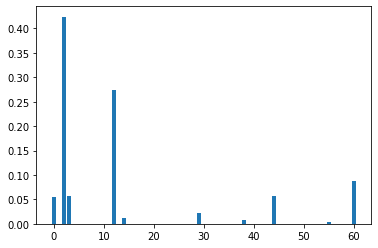

In [98]:
from matplotlib import pyplot
# get importance
importance = sevTree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Support Vector Machine¶

In [77]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Feature: 0, Score: -0.52944
Feature: 1, Score: -0.27518
Feature: 2, Score: 0.58362
Feature: 3, Score: -0.27471
Feature: 4, Score: 0.05527
Feature: 5, Score: -0.00221
Feature: 6, Score: 0.02503
Feature: 7, Score: 0.03094
Feature: 8, Score: 0.02766
Feature: 9, Score: 0.01117
Feature: 10, Score: -0.03799
Feature: 11, Score: -0.05183
Feature: 12, Score: -0.19095
Feature: 13, Score: 0.11814
Feature: 14, Score: 0.18631
Feature: 15, Score: 0.02900
Feature: 16, Score: -0.03472
Feature: 17, Score: -0.03366
Feature: 18, Score: -0.04481
Feature: 19, Score: 0.03251
Feature: 20, Score: 0.04635
Feature: 21, Score: -0.00041
Feature: 22, Score: 0.00376
Feature: 23, Score: -0.00012
Feature: 24, Score: 0.03149
Feature: 25, Score: 0.01788
Feature: 26, Score: -0.03102
Feature: 27, Score: -0.07477
Feature: 28, Score: -0.02453
Feature: 29, Score: -0.08070
Feature: 30, Score: 0.01214
Feature: 31, Score: 0.08278
Feature: 32, Score: 0.02110
Feature: 33, Score: 0.07292
Feature: 34, Score: -0.05253
Feature: 35, 

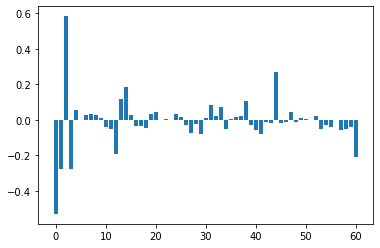

In [97]:
from matplotlib import pyplot
# get importance
importance = LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# 6. Model Evaluation using Test set

In [79]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [92]:
yhat = neigh3.predict(X_test)
print("KNN Jaccard test set Accuracy: ", jaccard_similarity_score(y_test, yhat))
print("KNN F1-score test set Accuracy: ", f1_score(y_test, yhat, average='weighted'))

KNN Jaccard test set Accuracy:  0.6605097181104389
KNN F1-score test set Accuracy:  0.6604109215116801


/Users/hanrong/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [83]:
predTree = sevTree.predict(X_test)
print("DecisionTrees Jaccard test set Accuracy: ", jaccard_similarity_score(y_test, predTree))
print("DecisionTrees F1-score test set Accuracy: ", f1_score(y_test, predTree, average='weighted'))

DecisionTrees Jaccard test set Accuracy:  0.6932037585274811
DecisionTrees F1-score test set Accuracy:  0.6911074433802831


/Users/hanrong/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [84]:
yhat2 = clf.predict(X_test)
print("SVM Jaccard test set Accuracy: " , jaccard_similarity_score(y_test, yhat2))
print("SVM F1-score test set Accuracy: ", f1_score(y_test, yhat2, average='weighted'))

SVM Jaccard test set Accuracy:  0.7063328613721199
SVM F1-score test set Accuracy:  0.7063154041034252


/Users/hanrong/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [85]:
yhat3 = LR.predict(X_test)
print("LogisticRegression Jaccard test set Accuracy: " , jaccard_similarity_score(y_test, yhat3))
print("LogisticRegression F1-score test set Accuracy: ", f1_score(y_test, yhat3, average='weighted'))
yhat_prob = LR.predict_proba(X_test)
print("LogisticRegression logloss: : %.2f" % log_loss(y_test, yhat_prob))

LogisticRegression Jaccard test set Accuracy:  0.7057536362466212
LogisticRegression F1-score test set Accuracy:  0.7057533437422961
LogisticRegression logloss: : 0.58


/Users/hanrong/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Report
The accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.6645       | 0.6644        | NA      |
| Decision Tree      | 0.6916       | 0.6905        | NA      |
| SVM                | 0.7081       | 0.7080        | NA      |
| LogisticRegression | 0.7047       | 0.7047        | 0.57       |

# Advance Observation

Python imbalanced-learn module
A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's apply some of these resampling techniques, using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

https://machinelearningmastery.com/feature-selection-with-categorical-data/
How to Perform Feature Selection with Categorical Data


Correlation among multiple categorical variables (Pandas)


The Search for Categorical Correlation
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9